<a href="https://colab.research.google.com/github/skmyngo/ITB2022/blob/main/%EA%B3%BC%EC%A0%9C_%EC%8B%9C%EB%8F%841.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import mglearn

TypeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns         
import matplotlib.pyplot as plt

In [ ]:
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv")

print(health.columns)
display(health.info())   
display(health.head()) 

In [ ]:
health.describe()

,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK,DRK
count,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,3976.000000,4043.000000,4022.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000
mean,33.824388,0.498887,11.950037,160.822409,62.794954,124.639377,76.490972,103.751422,198.266139,132.813752,56.156369,116.260060,14.158768,1.125559,0.856913,27.898837,26.924808,38.135296,0.364333,0.572842
std,12.550239,0.500061,2.283252,9.201689,12.197016,14.739803,9.840721,24.309470,41.950654,92.928160,14.486046,37.834173,1.566687,0.503060,0.367349,18.261743,22.801052,57.009290,0.481302,0.494727
min,11.000000,0.000000,9.000000,130.000000,30.000000,78.000000,50.000000,58.000000,70.000000,14.000000,19.000000,13.000000,5.900000,1.000000,0.050000,5.000000,2.000000,3.000000,0.000000,0.000000
25%,27.000000,0.000000,10.000000,155.000000,55.000000,114.000000,70.000000,91.000000,169.000000,77.000000,46.000000,89.000000,13.200000,1.000000,0.700000,20.000000,16.000000,16.000000,0.000000,0.000000
50%,41.000000,0.000000,12.000000,160.000000,60.000000,124.000000,77.000000,99.000000,197.000000,111.000000,54.000000,115.000000,14.200000,1.000000,0.800000,24.000000,21.000000,24.000000,0.000000,1.000000
75%,44.000000,1.000000,13.000000,170.000000,70.000000,134.000000,82.000000,109.000000,225.000000,160.000000,65.000000,141.000000,15.200000,1.000000,1.000000,30.000000,31.000000,38.000000,1.000000,1.000000
max,49.000000,1.000000,18.000000,195.000000,120.000000,199.000000,130.000000,473.000000,387.000000,1701.000000,125.000000,297.000000,19.400000,6.000000,9.200000,484.000000,477.000000,976.000000,1.000000,1.000000


In [ ]:
!pip install pandas
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


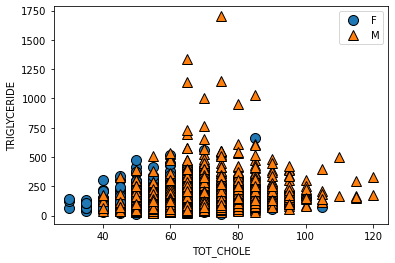

In [ ]:
mglearn.discrete_scatter(health['WEIGHT'], health['TRIGLYCERIDE'], health['SEX'])
plt.xlabel("TOT_CHOLE")
plt.ylabel("TRIGLYCERIDE")
plt.legend()
plt.show()

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


X = health.iloc[:, 1:10]  # 30개 변수 
#y = health.iloc[:, 0]   # target 변수 diagnosis 
y = health['TRIGLYCERIDE']

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

NameError: ignored

In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.125
시험용 데이터 정확도: 0.113


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "양성", "악성"],
                feature_names=health.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

ValueError: ignored

In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]


ValueError: ignored

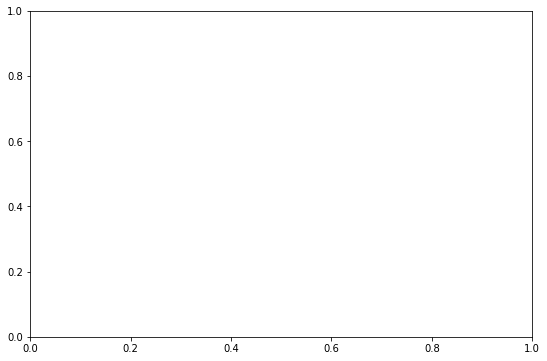

In [ ]:
import numpy as np

def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health.columns[0:])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health.columns[1:])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_health(tree)

In [ ]:
res = pd.DataFrame(result)
res["name"] = health.columns[0:]
display(res.info())

# perimeter_worst의 비중이 가장 큼, 루트 노드에서 이 값부터 사용 
display(res.sort_values(by='name'))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       22 non-null     float64
 1   name    22 non-null     object 
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


None

,0,name
1,1.0,AGE_GROUP
11,0.0,BLDS
9,0.0,BP_HIGH
10,0.0,BP_LWST
18,0.0,CREATININE
21,0.0,GAMMA_GTP
14,0.0,HDL_CHOLE
7,0.0,HEAR_LEFT
8,0.0,HEAR_RIGHT
2,0.0,HEIGHT


In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.973


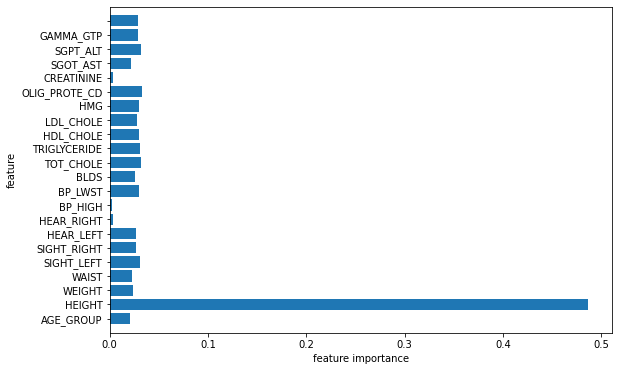

In [ ]:
plot_feature_importances_health(forest)

In [ ]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.91919192 0.91919192 0.91919192 0.91919192 0.91582492 0.91919192
 0.91919192 0.9222973  0.91891892 0.91891892]
Random forest:  [0.95286195 0.95622896 0.97643098 0.97306397 0.93939394 0.94276094
 0.94612795 0.97972973 0.9527027  0.9527027 ]
Accuracy mean
Decision tree :0.919
Random forest :0.957


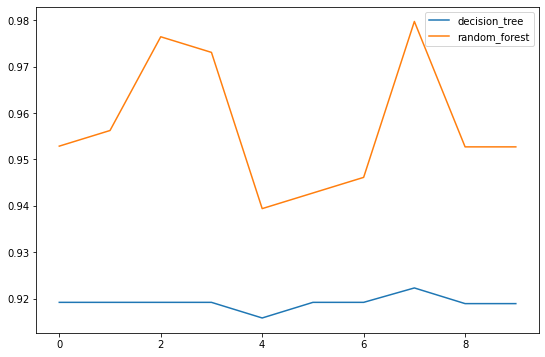

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 1.000


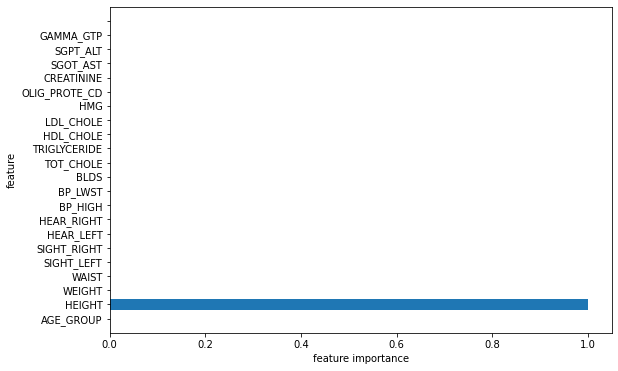

In [ ]:
plot_feature_importances_health(gbrt)

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=4)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 1.000


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 1.000


In [ ]:
dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.91919192 0.91919192 0.91919192 0.91919192 0.91582492 0.91919192
 0.91919192 0.9222973  0.91891892 0.91891892]
Random forest:  [0.95286195 0.95622896 0.97643098 0.97306397 0.93939394 0.94276094
 0.94612795 0.97972973 0.9527027  0.9527027 ]
Gradient boosting:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy mean
Decision tree :0.919
Random forest :0.957
Gradient boosting :1.000
